In [17]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

csv_2019 = "TennisData/wta_matches_qual_itf_2019.csv"
# csv_2020 = "TennisData/wta_matches_qual_itf_2020.csv"
# csv_2021 = "TennisData/wta_matches_qual_itf_2021.csv"
# csv_2022 = "TennisData/wta_matches_qual_itf_2022.csv"

df_2019 = pd.read_csv(csv_2019)
cols = list(df_2019.columns)


/tmp/ipykernel_45466/3393729767.py:11: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(csv_2019)


In [18]:
# CSV shape, , columns, head
print(f"Shape: {df_2019.shape}")
print(f"Columns: {list(df_2019.columns)}")
print(df_2019.head())

Shape: (29392, 49)
Columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  2019-1059       Taipei    Hard         32             C      20191111   
1  2019-1059       Taipei    Hard         32             C      20191111   
2  2019-1059       Taipei    Hard         32             C      20191111   
3  2019-1059       Taipei    Hard  

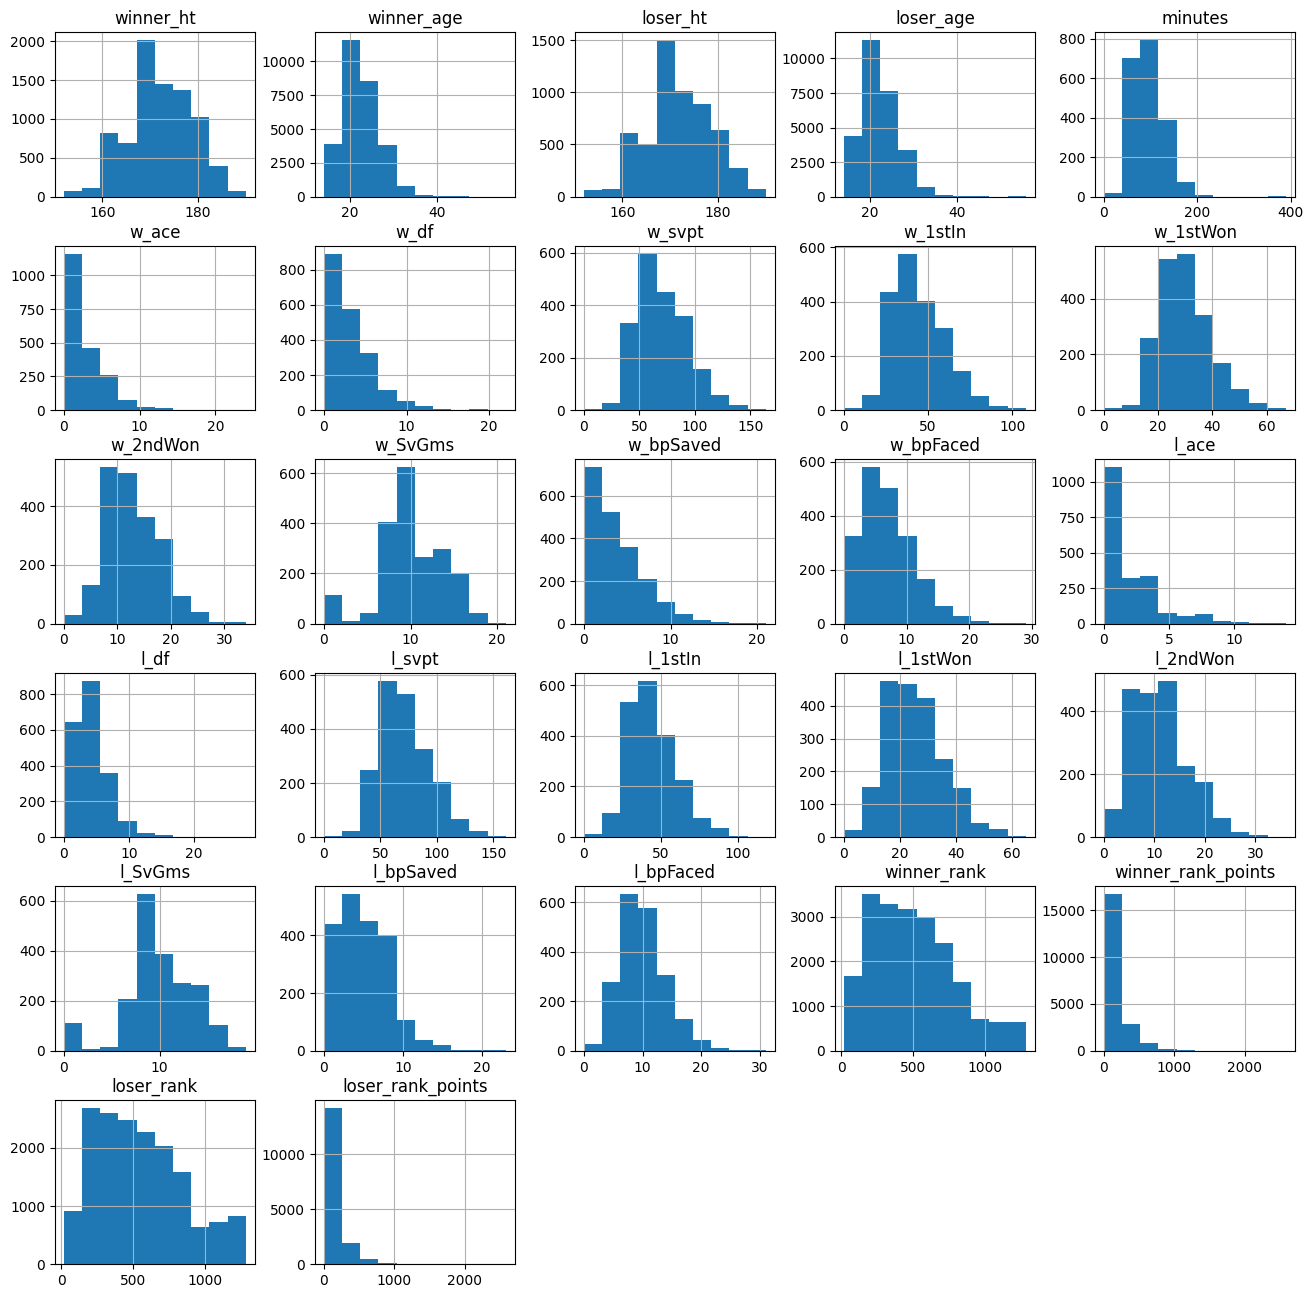

In [19]:
# Drop unwnted columns
dropped_cols = ["tourney_id", "tourney_name", "draw_size", "tourney_date", "match_num", "winner_id", "loser_id", "winner_seed", "loser_seed", "winner_entry", "loser_entry", "winner_name", "loser_name", "winner_ioc", "loser_ioc", "best_of", "round"]

selected_df_2019  = df_2019.drop(dropped_cols, axis=1)
selected_df_2019.hist(figsize=(16,16))
plt.show()

In [20]:
selected_df_2019.describe

<bound method NDFrame.describe of       surface tourney_level winner_hand  winner_ht  winner_age loser_hand  \
0        Hard             C           R      179.0        26.5          R   
1        Hard             C           L      166.0        25.2          R   
2        Hard             C           R      174.0        21.9          R   
3        Hard             C           R      170.0        18.9          R   
4        Hard             C           R      164.0        26.8          R   
...       ...           ...         ...        ...         ...        ...   
29387    Hard             I           R      175.0        15.3          R   
29388    Hard             I           R      175.0        20.6          R   
29389    Hard             I           R        NaN        18.9          L   
29390    Hard             I           R      162.0        24.2          R   
29391    Hard             I           R      175.0        15.3          R   

       loser_ht  loser_age           scor

In [21]:
# Summary statistics of categorial variables

selected_df_2019.describe(include='object') 

,surface,tourney_level,winner_hand,loser_hand,score
count,29392,29392,29392,29392,29371
unique,4,10,3,3,2971
top,Hard,15,R,R,6-2 6-2
freq,15036,13193,16508,14177,921


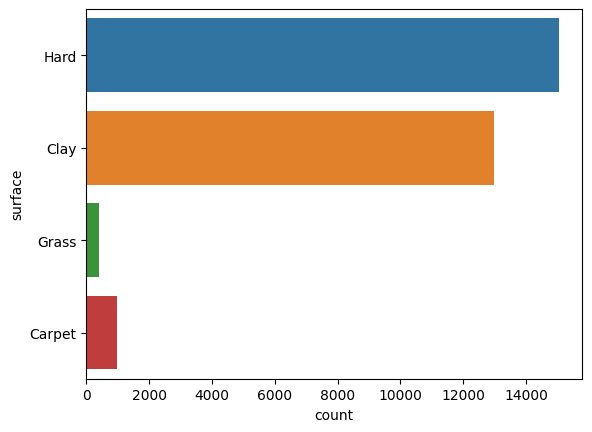

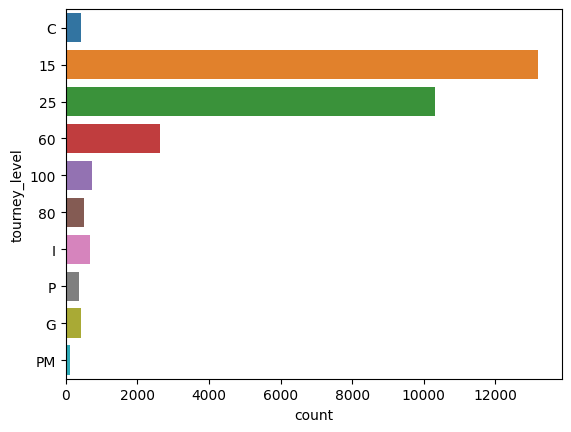

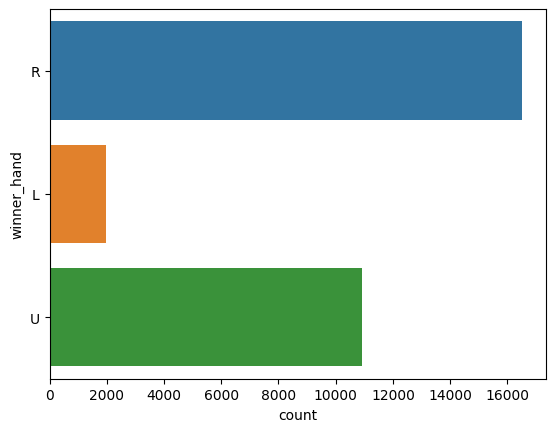

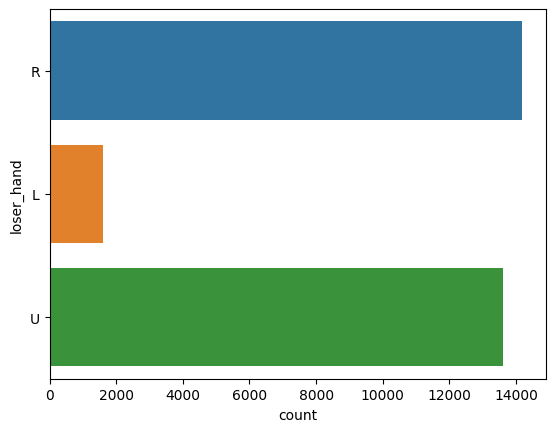

In [22]:
import seaborn as sns

for col in selected_df_2019.select_dtypes(include='object'):
    if selected_df_2019[col].nunique() <= 22:
        sns.countplot(y=col, data=selected_df_2019)
        plt.show()

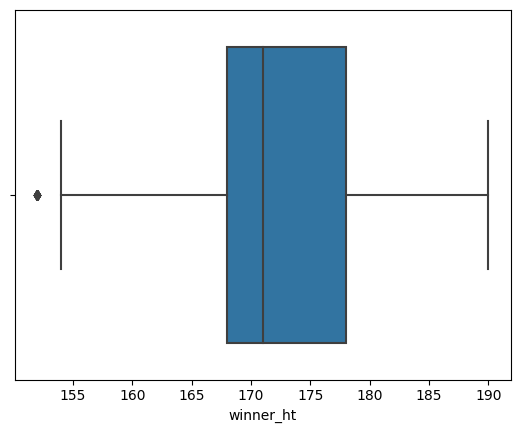

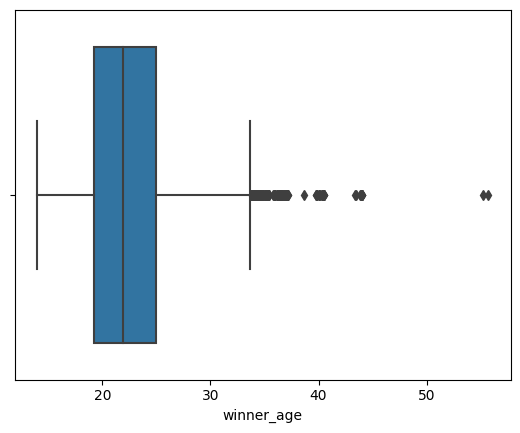

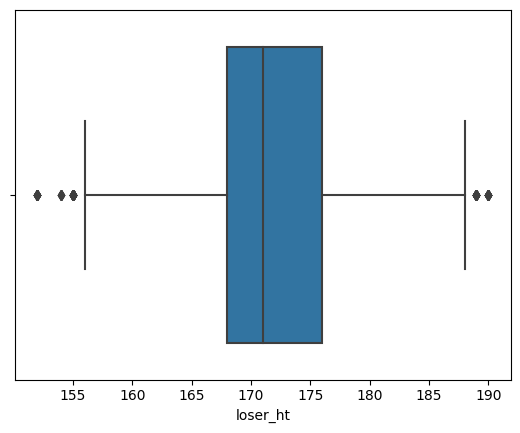

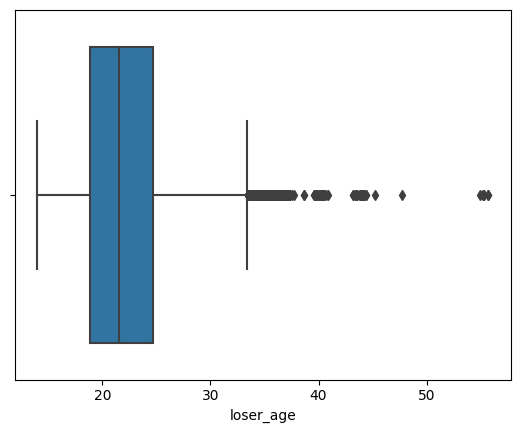

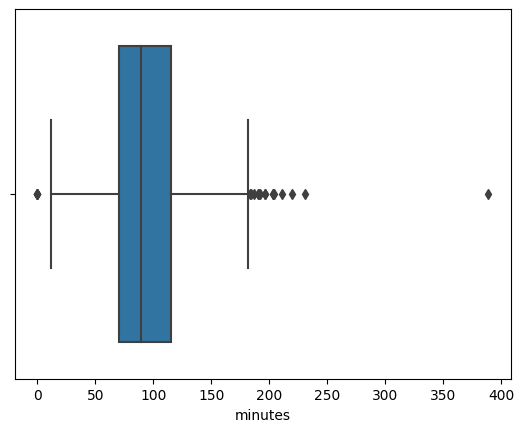

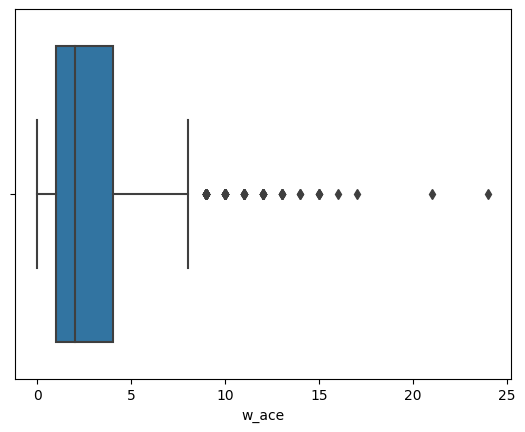

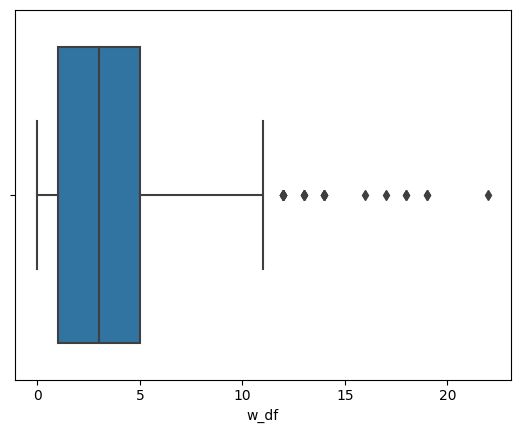

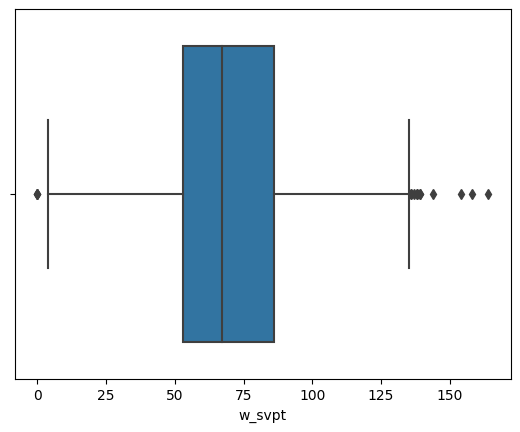

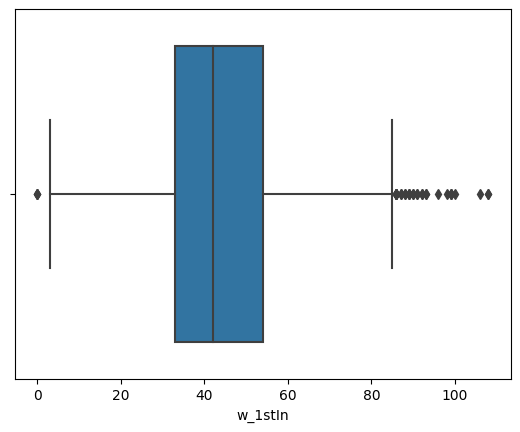

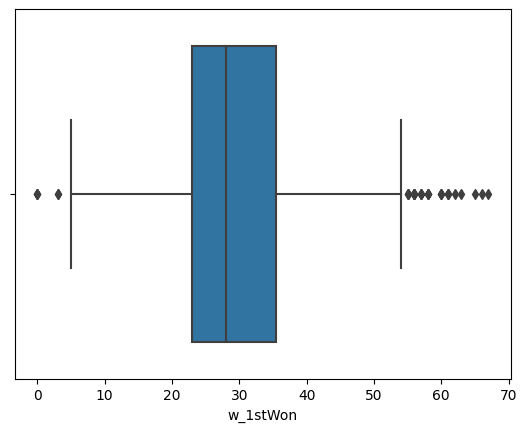

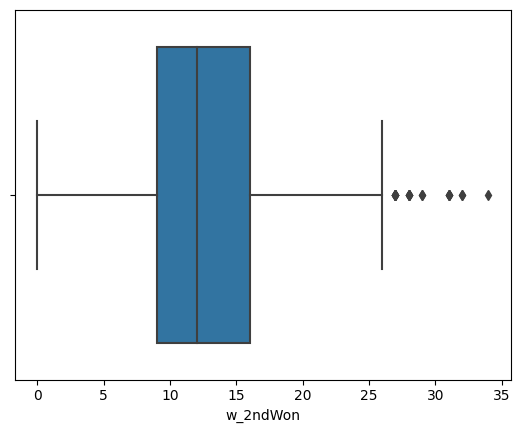

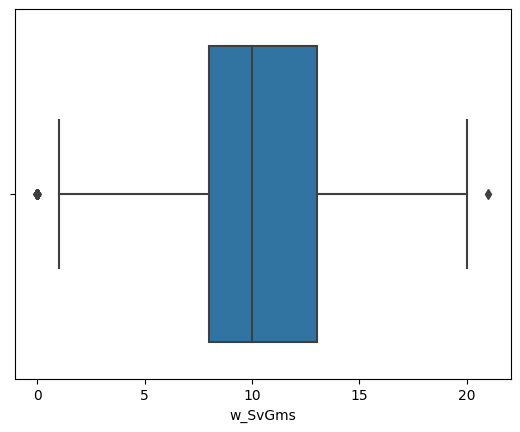

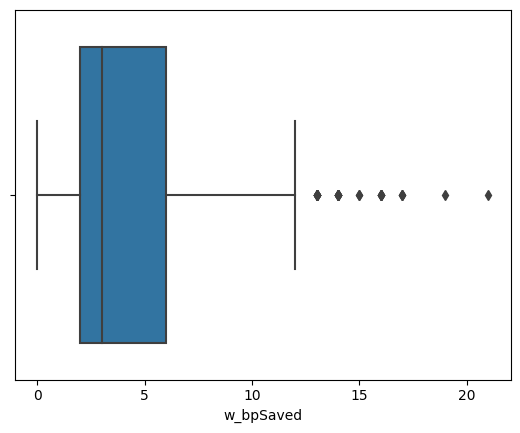

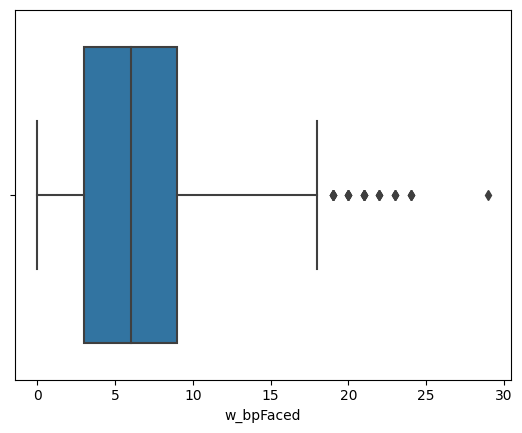

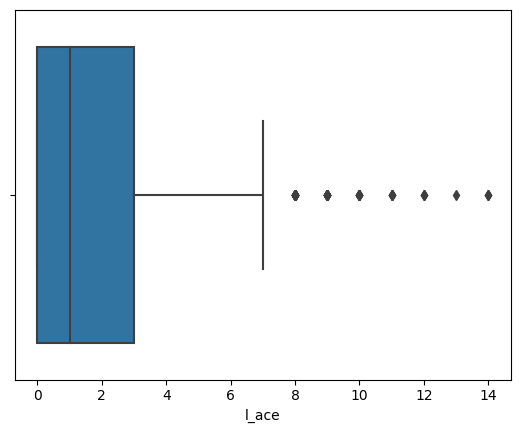

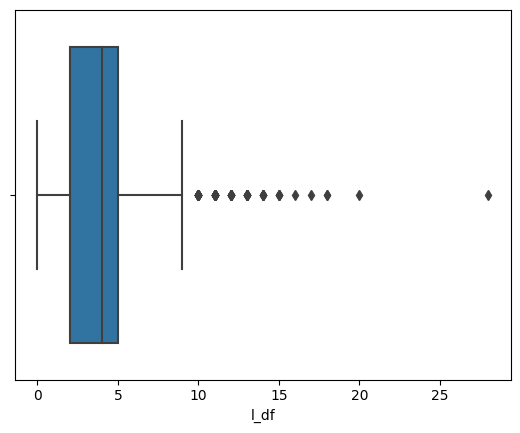

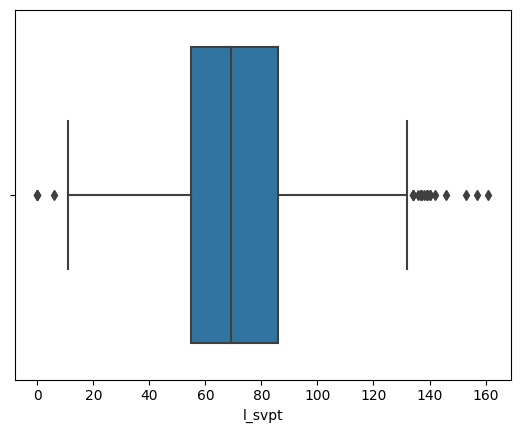

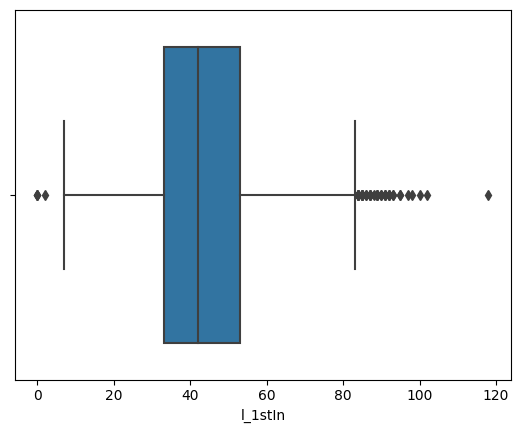

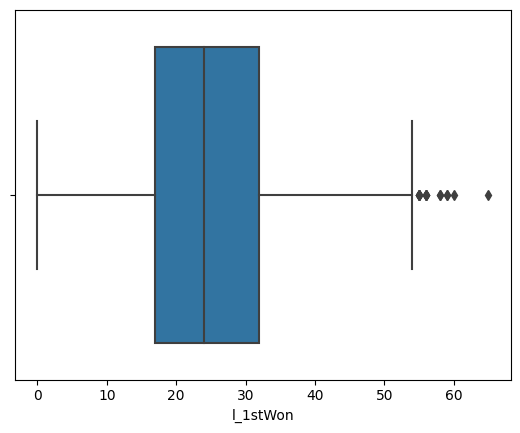

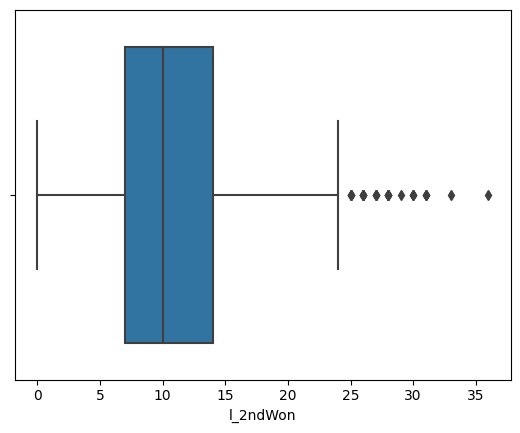

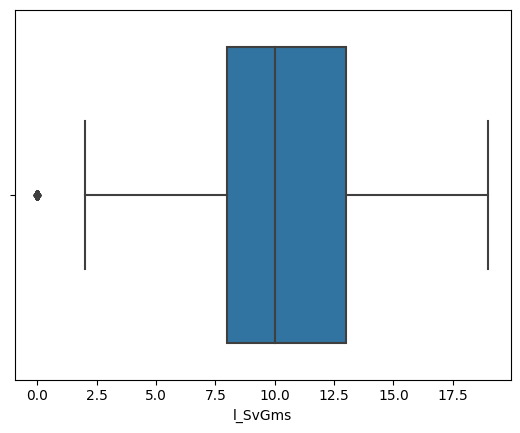

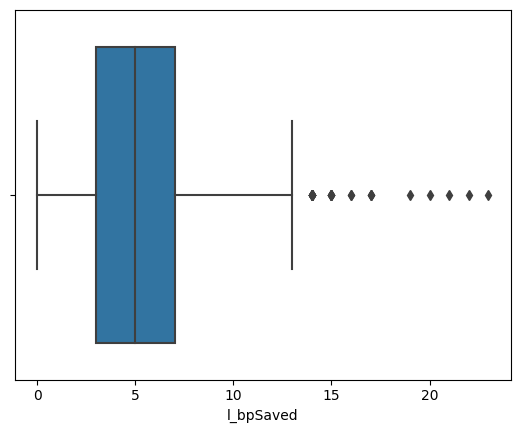

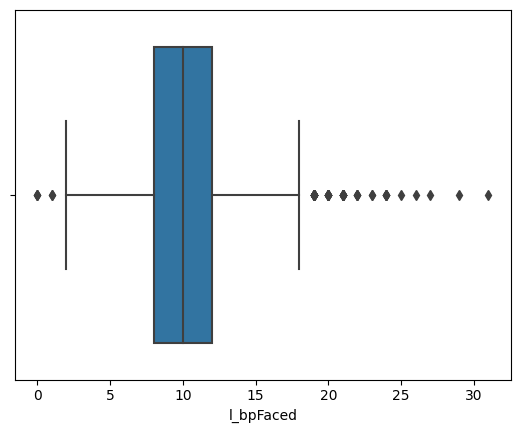

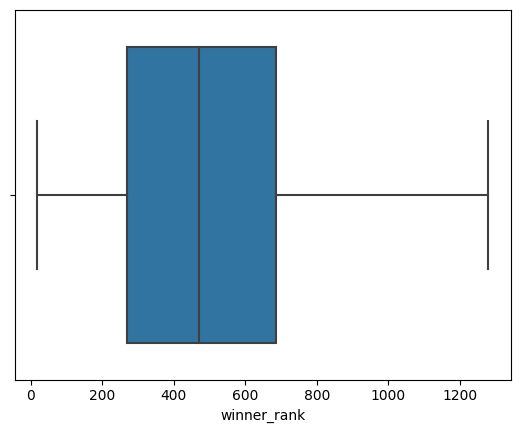

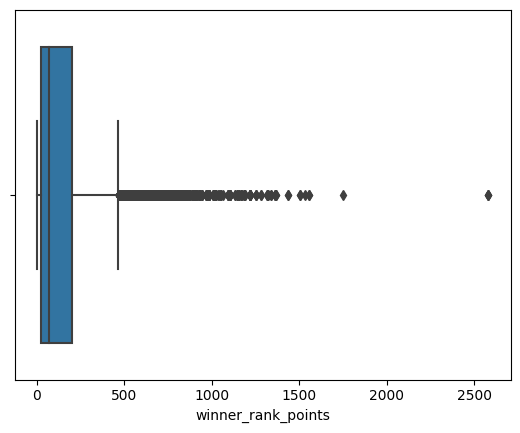

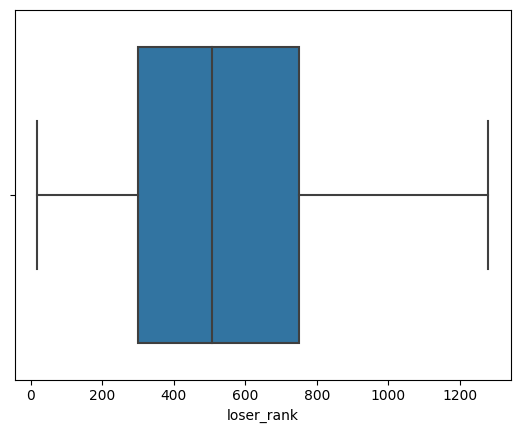

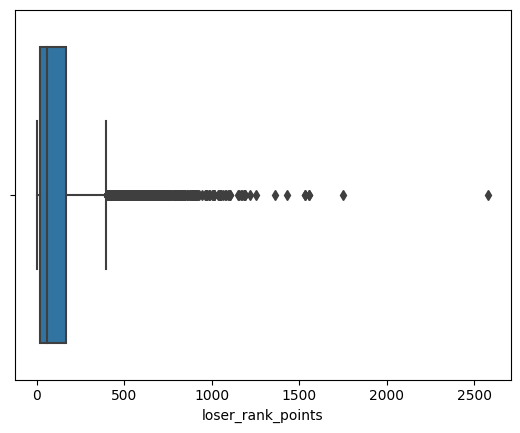

In [23]:
# Boxplot
interested_cols = [colname for colname in cols if colname not in dropped_cols]

for col in interested_cols:
    try:
        sns.boxplot(x = col, data=selected_df_2019)
    except TypeError:
        pass
    plt.show()

In [24]:
# Correlation for numeric features
corr = selected_df_2019.corr()
corr

/tmp/ipykernel_45466/905004156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = selected_df_2019.corr()


,winner_ht,winner_age,loser_ht,loser_age,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
winner_ht,1.000000,-0.063676,0.015648,0.019898,-0.022001,0.261330,0.043857,0.003004,-0.029212,0.029076,...,0.024782,0.062946,0.020930,-0.003745,0.046294,-0.004627,-0.082227,0.106971,-0.064007,0.072354
winner_age,-0.063676,1.000000,0.004580,0.128881,0.019619,-0.058101,-0.003375,-0.007306,0.026091,0.017726,...,-0.006990,-0.035365,0.023572,0.005456,0.003310,0.020497,-0.317758,0.263585,-0.210410,0.181065
loser_ht,0.015648,0.004580,1.000000,-0.054192,-0.028688,-0.012162,0.033532,-0.011384,-0.008748,0.035559,...,-0.034990,0.032153,0.053765,0.006277,0.016244,-0.043109,-0.067206,0.065903,-0.091321,0.104771
loser_age,0.019898,0.128881,-0.054192,1.000000,0.023187,0.021120,0.021618,-0.002948,-0.000449,-0.010982,...,0.026178,0.010861,-0.046276,-0.012264,-0.005670,-0.004431,-0.244121,0.219853,-0.308836,0.245575
minutes,-0.022001,0.019619,-0.028688,0.023187,1.000000,0.115371,0.432033,0.894691,0.828458,0.774863,...,0.815664,0.810064,0.678694,0.645421,0.407029,0.459241,0.056739,-0.055152,-0.073630,0.042920
w_ace,0.261330,-0.058101,-0.012162,0.021120,0.115371,1.000000,0.113689,0.199023,0.082759,0.220445,...,0.174882,0.247899,0.200262,0.131067,0.041225,-0.048119,-0.033855,0.064101,-0.052959,0.034249
w_df,0.043857,-0.003375,0.033532,0.021618,0.432033,0.113689,1.000000,0.468436,0.320809,0.321353,...,0.341935,0.328974,0.289646,0.287134,0.186361,0.251945,0.067123,-0.057608,0.007816,0.020113
w_svpt,0.003004,-0.007306,-0.011384,-0.002948,0.894691,0.199023,0.468436,1.000000,0.927546,0.885174,...,0.764528,0.791951,0.661203,0.654236,0.299935,0.343986,0.058449,-0.059550,-0.107421,0.075753
w_1stIn,-0.029212,0.026091,-0.008748,-0.000449,0.828458,0.082759,0.320809,0.927546,1.000000,0.936936,...,0.717536,0.733565,0.590690,0.610010,0.269752,0.320193,0.063761,-0.080026,-0.110219,0.078099
w_1stWon,0.029076,0.017726,0.035559,-0.010982,0.774863,0.220445,0.321353,0.885174,0.936936,1.000000,...,0.686678,0.757568,0.626891,0.585398,0.240594,0.216249,0.065942,-0.068542,-0.097063,0.066352


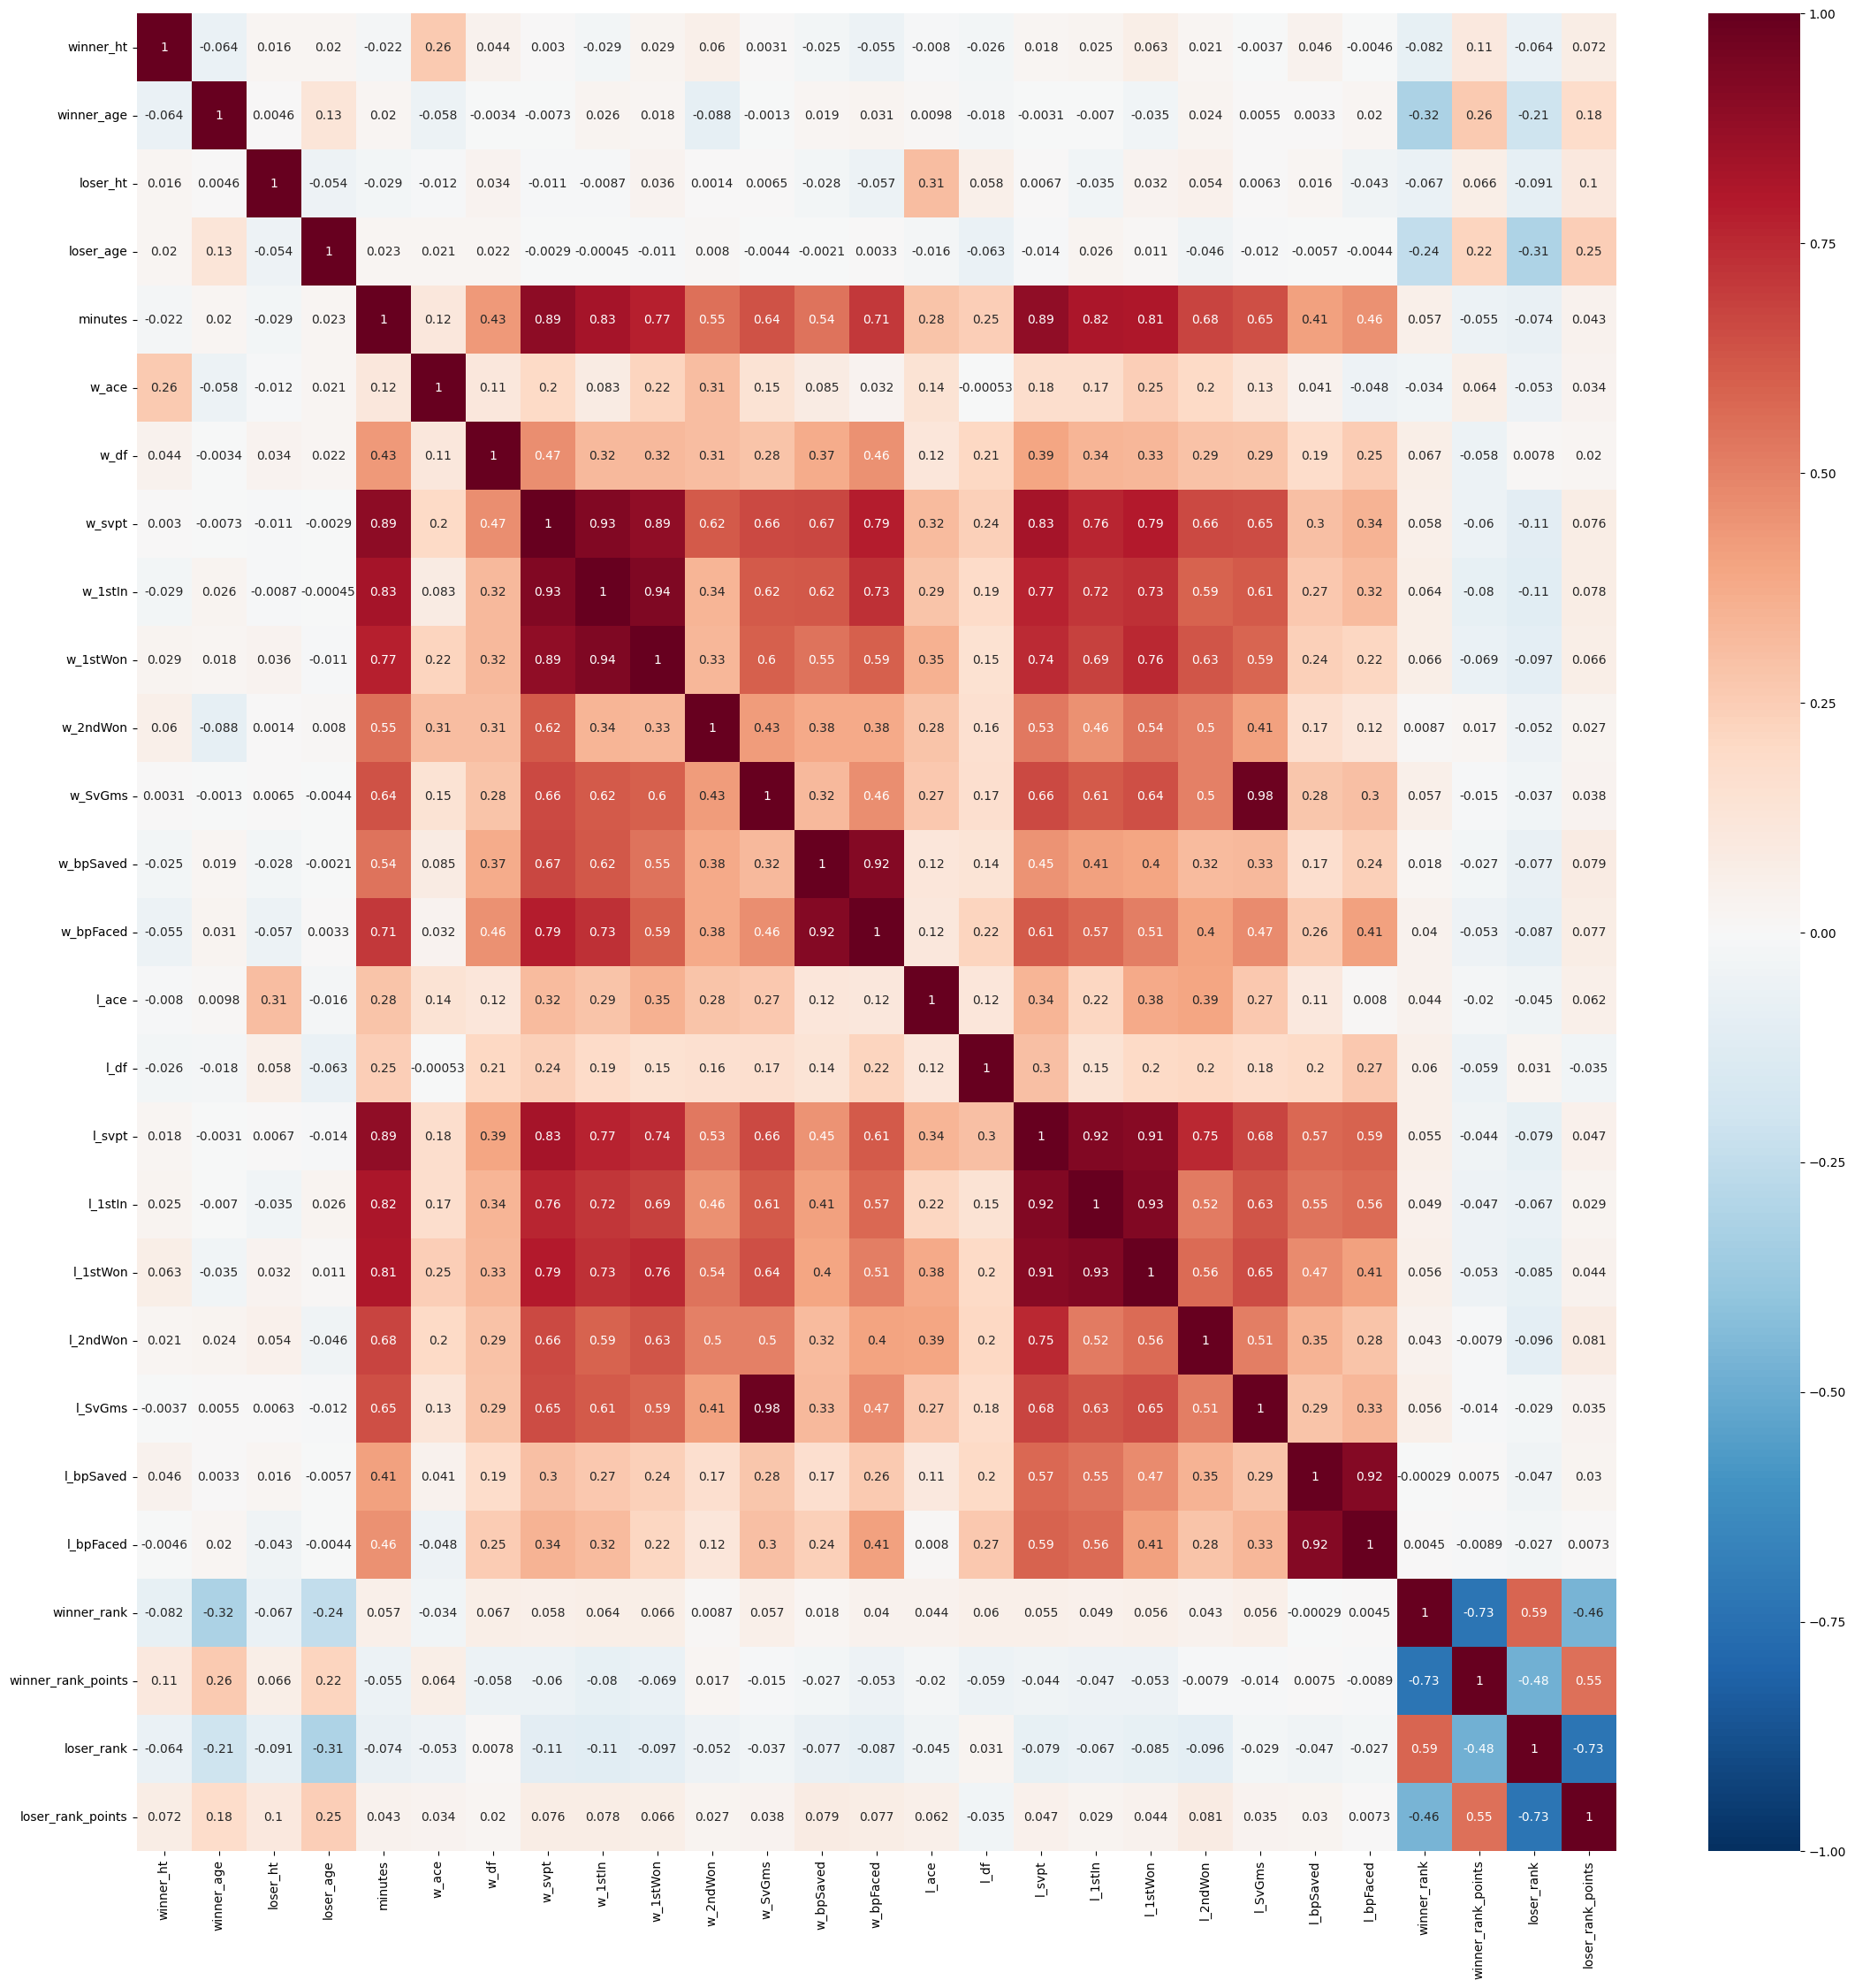

In [25]:
# Correlation heat map
plt.figure(figsize=(27,27))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()